In [5]:
#Importing the relevant libraries
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
scaler = StandardScaler() 
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import mean_squared_error, plot_confusion_matrix, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, RandomForestClassifier


import warnings
warnings.filterwarnings("ignore")

In [6]:
#reading the train datset
df = pd.read_csv("E:/Datatrained/Practice Project/HR Analytics Project/WA_Fn-UseC_-HR-Employee-Attrition.csv" )
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [7]:
#Understanding the columns info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [9]:
df.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [10]:
df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [11]:
df.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [12]:
df.Gender.value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [13]:
df.JobRole.value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [14]:
df.MaritalStatus.value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [15]:
df.Over18.value_counts()

Y    1470
Name: Over18, dtype: int64

In [16]:
df.OverTime.value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [17]:
#dropping irrelevant columns
df=df.drop(["Over18","EmployeeNumber","EmployeeCount","StandardHours"],axis=1)

In [18]:
#Understanding the descriptiove statistics
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [19]:
#Understanding the difference between Attrition Yes and No
df.groupby(df.Attrition).describe()

Age                                                   DailyRate  \
            count       mean      std   min   25%   50%   75%   max     count   
Attrition                                                                       
No         1233.0  37.561233  8.88836  18.0  31.0  36.0  43.0  60.0    1233.0   
Yes         237.0  33.607595  9.68935  18.0  28.0  32.0  39.0  58.0     237.0   

                       ... YearsSinceLastPromotion       YearsWithCurrManager  \
                 mean  ...                     75%   max                count   
Attrition              ...                                                      
No         812.504461  ...                     3.0  15.0               1233.0   
Yes        750.362869  ...                     2.0  15.0                237.0   

                                                         
               mean       std  min  25%  50%  75%   max  
Attrition                                                
No         4.367397  3.594116  0.0  2.0  3.0  7.0  17.0  
Yes        2.852321  3.143349  0.0  0.0  2.0  5.0  14.0  

[2 rows x 184 columns]

In [20]:
#Storing the integer and object columns
intcol=df.select_dtypes(include=["int64"]).columns
objcol=df.select_dtypes(include=["object"]).columns

In [21]:
#understanding the factors that contributed to an employee leaving the organization
df.groupby(df.Attrition)[intcol].mean()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
No,37.561233,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
Yes,33.607595,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


In [22]:
df.groupby(df.Attrition)[objcol].agg(pd.Series.mode)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
Attrition,,,,,,,,
No,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,No
Yes,Yes,Travel_Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,Single,Yes


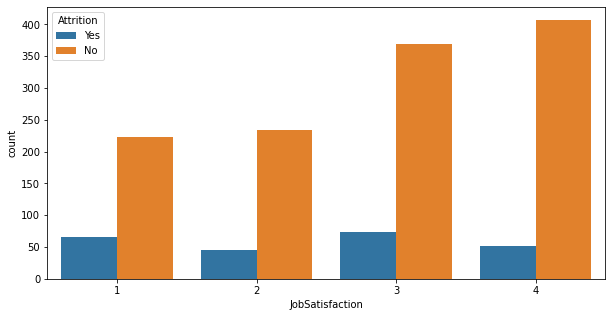

In [23]:
plt.figure(figsize=(10, 5))
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)
plt.show();

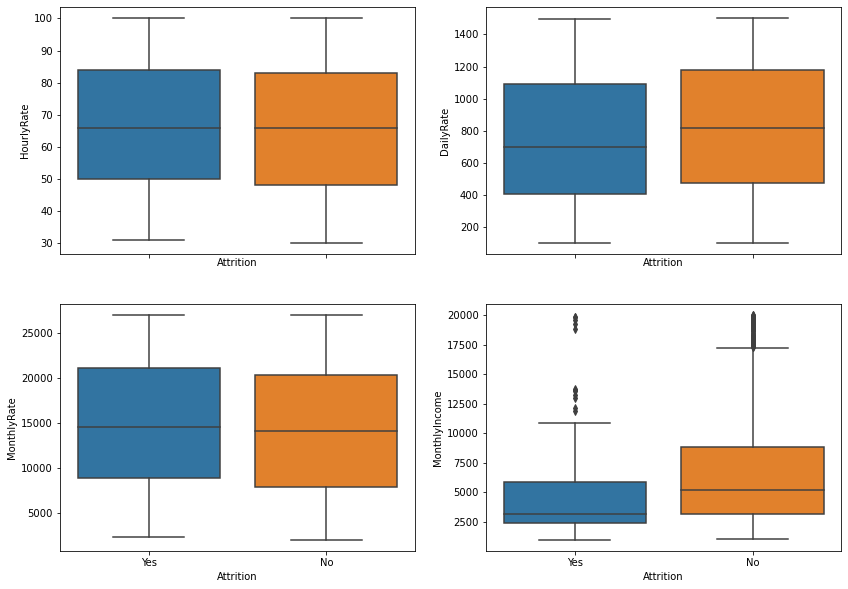

In [24]:
#Plotting various Box plots to understand about data spread and outliers
f, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True)
sns.boxplot(x='Attrition', y='HourlyRate', data=df, ax=axes[0][0])
sns.boxplot(x='Attrition', y='DailyRate', data=df, ax=axes[0][1])
sns.boxplot(x='Attrition', y='MonthlyRate',data=df, ax=axes[1][0])
sns.boxplot(x='Attrition', y='MonthlyIncome',data=df, ax=axes[1][1])
plt.show();

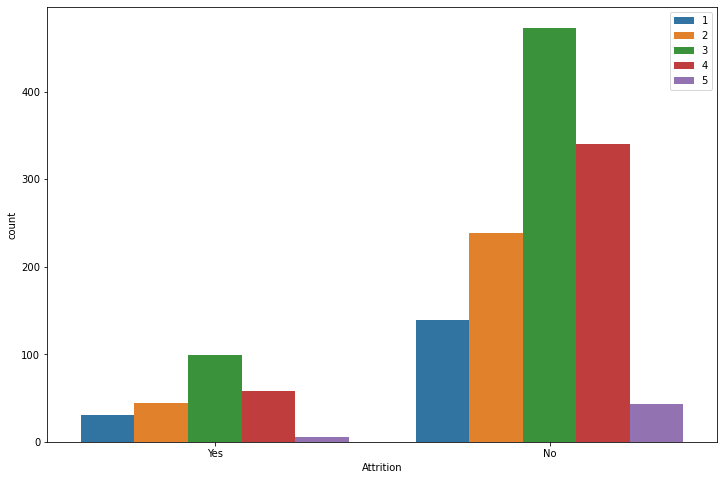

In [25]:
#Attrition vs Education
plt.figure(figsize=(12, 8))
sns.countplot(x='Attrition', hue='Education', data=df)
plt.legend(loc='best')
plt.show()


<AxesSubplot:>

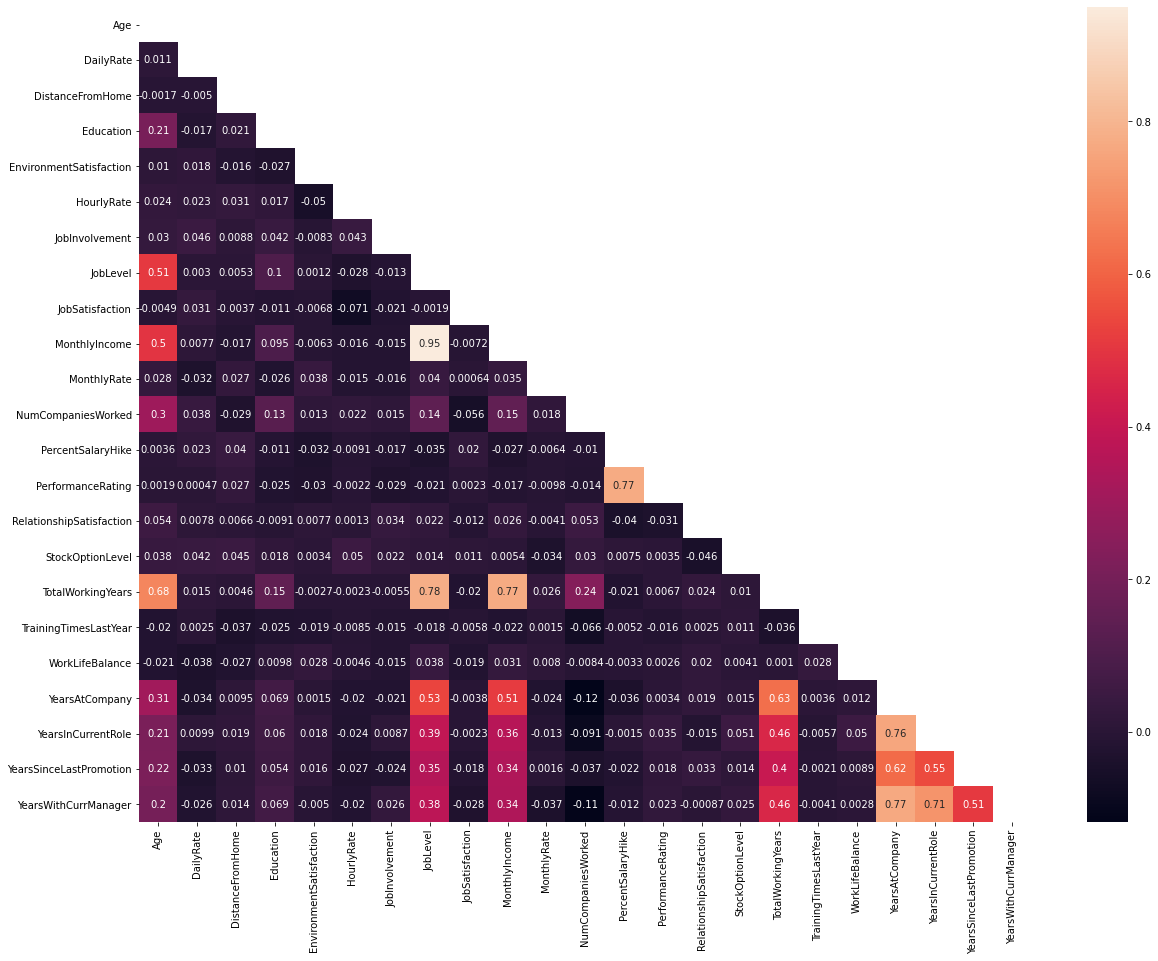

In [26]:
#correlation matrix
plt.figure(figsize=(20,15))
#ax=subplot(111)
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, mask=matrix)

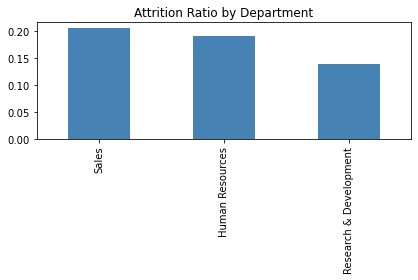

In [27]:
#Finding the Attrition Ratio vs Department
df_temp=df
df_temp["Attrition"]=np.where(df_temp["Attrition"]=="Yes",1,0)
df_temp.groupby('Department')['Attrition'].mean().sort_values(ascending=False).plot(kind='bar', color='steelblue')
plt.title('Attrition Ratio by Department')
plt.xlabel('')
plt.tight_layout()

In [28]:
#Dummy encoding the Object columns
dummy=df
c=0
for i in objcol:
    dummy = pd.concat([dummy,pd.get_dummies(dummy[i], prefix=i,drop_first=True)],axis=1)
df=pd.concat([df.drop(objcol,axis=1),dummy.drop(objcol,axis=1)],axis=1)


In [29]:
#printing the column names
df.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Age', 'DailyRate',
       'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_1',
 

In [30]:
#Split the data to y and x 
Y = df[['Attrition_1']]
X = df.drop('Attrition_1', axis=1)

<AxesSubplot:xlabel='Attrition_1', ylabel='count'>

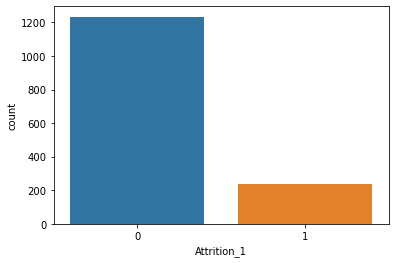

In [31]:
#checking for imbalance
sns.countplot(x="Attrition_1",data=df)

In [36]:
#Using SMOTE for oversampling the minority class
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

X_resampled, Y_resampled = SMOTE(sampling_strategy=0.8,random_state=2).fit_resample(np.array(X),Y.values.ravel()) 

In [37]:
#Splitting the train and test data and scaling respectively
X_train, X_test,Y_train, Y_test=model_selection.train_test_split(X_resampled,Y_resampled,test_size=0.2,random_state=2,stratify=Y_resampled)
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [45]:
#Boruta Method to find out most important features
from boruta import BorutaPy

forest = RandomForestClassifier(n_jobs=-1, max_depth=5, random_state=1)
 
forest.fit(X_test, Y_test)

# Apply The Full Featured Classifier To The Test Data
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, f1_score

Y_pred = forest.predict(X_test)
ac = accuracy_score(Y_test, Y_pred)
fscore = f1_score(Y_test ,Y_pred,average='micro')

# View The Accuracy Of Our Full Feature (8 Features) Model
print("Baseline Model Accuracy:", ac)
print("Baseline Model F1 Score:", fscore)

Baseline Model Accuracy: 0.9414414414414415
Baseline Model F1 Score: 0.9414414414414415


In [46]:
# define Boruta feature selection method
# boruta_selector = BorutaPy(forest, n_estimators='auto', verbose=2)
boruta_selector = BorutaPy(forest, n_estimators='auto',verbose=2, random_state=1)

# find all relevant features
boruta_selector.fit(np.array(X_train), np.array(Y_train))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	67
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	67
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	67
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	67
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	67
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	67
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	67
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	44
Tentative: 	8
Rejected: 	15
Iteration: 	9 / 100
Confirmed: 	44
Tentative: 	8
Rejected: 	15
Iteration: 	10 / 100
Confirmed: 	44
Tentative: 	8
Rejected: 	15
Iteration: 	11 / 100
Confirmed: 	44
Tentative: 	8
Rejected: 	15
Iteration: 	12 / 100
Confirmed: 	47
Tentative: 	5
Rejected: 	15
Iteration: 	13 / 100
Confirmed: 	47
Tentative: 	5
Rejected: 	15
Iteration: 	14 / 100
Confirmed: 	47
Tentative: 	5
Rejected: 	15
Iteration: 	15 / 100
Confirmed: 	47
Tentative: 	5
Rejected: 	15
Iteration: 	16 / 100
Confirmed: 	47
Tentative: 	5
Reject

BorutaPy(estimator=RandomForestClassifier(max_depth=5, n_estimators=200,
                                          n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x23B29409E40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x23B29409E40, verbose=2)

In [47]:
# Let's visualise it better in the form of a table
selected_rfe_features = pd.DataFrame({'Feature':list(X.columns),
                                      'Ranking':boruta_selector.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
0,Age,1
28,HourlyRate,1
29,JobInvolvement,1
30,JobLevel,1
31,JobSatisfaction,1
...,...,...
60,JobRole_Research Director,16
46,BusinessTravel_Travel_Frequently,17
63,JobRole_Sales Representative,17
53,EducationField_Other,19


In [48]:
#Selecting only the important features
X_important_train = boruta_selector.transform(np.array(X_train))
X_important_test = boruta_selector.transform(np.array(X_test))

In [49]:
#Spot checking different algorithms
models=[]
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('RFC',RandomForestClassifier()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('GBC',GradientBoostingClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

#evaluate each model in turn
results=[]
names=[]
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
    cv_results=model_selection.cross_val_score(model, X_important_train, Y_train, cv=kfold, scoring='f1_weighted')
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)" %  (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.869263 (0.020997)
LDA: 0.871708 (0.020818)
RFC: 0.899250 (0.029975)
KNN: 0.866248 (0.019258)
CART: 0.797012 (0.031684)
GBC: 0.891412 (0.026869)
NB: 0.768126 (0.049490)
SVM: 0.894948 (0.019275)


In [50]:
#Using Grid search Cv for best hyperparameters
from sklearn.model_selection import GridSearchCV
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gs = GridSearchCV(forest, hyperF, cv = 5, verbose = 1, 
                      n_jobs = -1)
bestF = gs.fit(X_important_train, Y_train)

gs.best_params_

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


{'max_depth': 25,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 800}

In [51]:
#Storing the predictions
Y_pred=gs.predict(X_important_test)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       247
           1       0.90      0.87      0.88       197

    accuracy                           0.90       444
   macro avg       0.90      0.89      0.89       444
weighted avg       0.90      0.90      0.90       444



<AxesSubplot:>

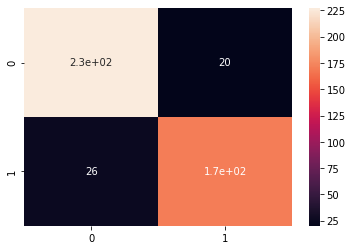

In [52]:
#checking out the metrices
print(classification_report(Y_test,Y_pred))
cnf_imp=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cnf_imp,annot=True)

In [57]:
!pip install yellowbrick

In [65]:
#Visualizing the ROCAUC curve
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(gs, classes=[0,1])
visualizer.fit(X_important_train, Y_train)        # Fit the training data to the visualizer
visualizer.score(X_important_test, Y_test)        # Evaluate the model on the test data
visualizer.show()        

ImportError: cannot import name 'safe_indexing' from 'sklearn.utils' (C:\Users\Amit Singh\anaconda3\lib\site-packages\sklearn\utils\__init__.py)